In [1]:
import matplotlib.pyplot as plt 
#import scipy.misc
import numpy as np
import json
from scipy import misc
from scipy.misc import imread

import keras

from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D, Concatenate
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Add, merge, concatenate
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator

from keras import __version__
print(__version__)

Using TensorFlow backend.


2.0.5


In [2]:
train_folder = '/home/ubuntu/data/sar/experiment_crops_20170809/train'
valid_folder = '/home/ubuntu/data/sar/experiment_crops_20170809/validate'


In [4]:
main_shape = (50, 50 ,1)
aux_shape = (1,1)

main_input = Input(shape=main_shape, name='main_input')

aux_input = Input(shape=aux_shape, name='aux_input')
x2 = Dense(1, activation='relu')(aux_input)

num_classes = 3

x = Cropping2D(cropping=((10, 10), (10, 10)))(main_input)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)

added = keras.layers.merge([x, x2], mode=)

([x, x2])
#merged = keras.layers.merge([x, x2])

# oncatenate(axis=-1)
# Add([x, x2])
# # ([x, x2])


out = Dense(num_classes, activation='softmax')(added)
model = keras.models.Model(inputs=[main_input, aux_input], outputs=out)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python2.7/dist-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


ValueError: Only layers of same output shape can be merged using sum mode. Layer shapes: [(None, 3136), (None, 1, 1)]

In [257]:
model.output_shape

(None, 1, 3)

In [258]:
print main_input.shape
print aux_input.shape
model.summary()


(?, 50, 50, 1)
(?, 1, 1)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
cropping2d_37 (Cropping2D)       (None, 30, 30, 1)     0           main_input[0][0]                 
____________________________________________________________________________________________________
conv2d_106 (Conv2D)              (None, 30, 30, 32)    320         cropping2d_37[0][0]              
____________________________________________________________________________________________________
max_pooling2d_71 (MaxPooling2D)  (None, 15, 15, 32)    0           conv2d_106[0][0]                 
__________________________________________________________________

In [259]:
from keras.utils import plot_model
plot_model(model, to_file='/home/ubuntu/data/sar/experiment_crops_20170809/model.png')

In [260]:
import json

In [5]:
train_class = []           
train_filename = []
train_crops = []
train_feature = []

valid_class = []
valid_filename = []
valid_crops = []
valid_feature = []

train_class_desc = 'oil_and_gas_infrastructure'
train_class_array = [1,0,0]
with open('/home/ubuntu/data/sar/experiment_crops_20170809/train/oil_and_gas_infrastructure_train.json') as json_data:
    json_train_data = json.load(json_data)
    for id_, item in json_train_data.iteritems():
        train_filename.append(id_)
        train_feature.append(item['distance to land'])
        train_class.append(train_class_array)
        file_path = train_folder + '/' + train_class_desc + '/' + id_
        img  = imread(file_path)
        train_crops.append(img)

train_class_array = [0,1,0]
train_class_desc = 'turbine'  
with open('/home/ubuntu/data/sar/experiment_crops_20170809/train/turbine_train.json') as json_data:
    json_train_data = json.load(json_data)
    for id_, item in json_train_data.iteritems():
        train_filename.append(id_)
        train_feature.append(item['distance to land'])
        train_class.append(train_class_array)
        file_path = train_folder + '/' + train_class_desc + '/' + id_
        img  = imread(file_path)
        train_crops.append(img)
        
train_class_array = [0,0,1]
train_class_desc = 'other'  
with open('/home/ubuntu/data/sar/experiment_crops_20170809/train/other_train.json') as json_data:
    json_train_data = json.load(json_data)
    for id_, item in json_train_data.iteritems():
        train_filename.append(id_)
        train_feature.append(item['distance to land'])
        train_class.append(train_class_array)
        file_path = train_folder + '/' + train_class_desc + '/' + id_
        img  = imread(file_path)
        train_crops.append(img)
    
valid_class_array = [1,0,0]
valid_class_desc = 'oil_and_gas_infrastructure'  
with open('/home/ubuntu/data/sar/experiment_crops_20170809/validate/oil_and_gas_infrastructure_validate.json') as json_data:
    json_validation_data = json.load(json_data)
    for id_, item in json_validation_data.iteritems():
        valid_filename.append(id_)
        valid_feature.append(item['distance to land'])
        valid_class.append(valid_class_array)
        file_path = valid_folder + '/' + valid_class_desc + '/' + id_
        img  = imread(file_path)
        valid_crops.append(img)
        
valid_class_array = [0,1,0]
valid_class_desc = 'turbine'  
with open('/home/ubuntu/data/sar/experiment_crops_20170809/validate/turbine_validate.json') as json_data:
    json_validation_data = json.load(json_data)
    for id_, item in json_validation_data.iteritems():
        valid_filename.append(id_)
        valid_feature.append(item['distance to land'])
        valid_class.append(valid_class_array)
        file_path = valid_folder + '/' + valid_class_desc + '/' + id_
        img  = imread(file_path)
        valid_crops.append(img)

valid_class_array = [0,0,1]
valid_class_desc = 'other'  
with open('/home/ubuntu/data/sar/experiment_crops_20170809/validate/other_validate.json') as json_data:
    json_validation_data = json.load(json_data)
    for id_, item in json_validation_data.iteritems():
        valid_filename.append(id_)
        valid_feature.append(item['distance to land'])
        valid_class.append(valid_class_array)
        file_path = valid_folder + '/' + valid_class_desc + '/' + id_
        img  = imread(file_path)
        valid_crops.append(img)
    


In [24]:
print "training crops:", len(train_filename)
print "training features:", len(train_feature)
print "validation crops:", len(valid_filename)
print "validation features:", len(valid_feature)

training crops: 2000
training features: 2000
validation crops: 500
validation features: 500


In [50]:
np_train_class = np.array(train_class)
np_train_filename = np.array(train_filename)
np_train_crops = np.array(train_crops)
np_train_feature = np.array(train_feature)

np_valid_class = np.array(valid_class)
np_valid_filename = np.array(valid_filename)
np_valid_crops = np.array(valid_crops)
np_valid_feature = np.array(valid_feature)

# Reshape for keras format
np_train_crops = np.expand_dims(np_train_crops, axis=3)
np_train_feature = np.expand_dims(np_train_feature, axis=1)

np_valid_crops = np.expand_dims(np_valid_crops, axis=3)
np_valid_feature = np.expand_dims(np_valid_feature, axis=1)

In [51]:
print np_train_crops.shape
print np_train_feature.shape
print np_train_class.shape

print np_valid_crops.shape
print np_valid_feature.shape
print np_valid_class.shape

(2000, 50, 50, 1)
(2000, 1)
(2000, 3)
(500, 50, 50, 1)
(500, 1)
(500, 3)


In [52]:
num_classes = 3

img_input = Input(shape=np_train_crops.shape[1:], name='img_input')
dist2land_input = Input(shape=(1,), name='dist2land_input')

# x2 = Dense(1, activation='relu')(aux_input)
# bn_inp = BatchNormalization()(dist2land_input)
#
# x = MaxPooling2D()(inp)
# x = BatchNormalization(axis=1)(x)
# x = Dropout(p/4)(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(p)(x)
# x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(p/2)(x)
# x = merge([x,bn_inp], 'concat')
# x = Dense(8, activation='softmax')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
out = Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(inputs=[img_input, dist2land_input], outputs=out)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [53]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_input (InputLayer)           (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_19 (Conv2D)               (None, 50, 50, 32)    320         img_input[0][0]                  
____________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_19[0][0]                  
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_13[0][0]           
___________________________________________________________________________________________

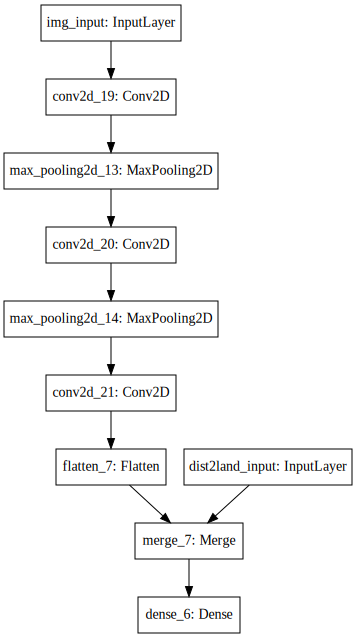

In [54]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [58]:
model.fit([np_train_crops, np_train_feature], 
          np_train_class,
          batch_size=32,
          epochs=1,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 2000 samples, validate on 500 samples
Epoch 1/1
2000/2000 [==============================] - 9s - loss: 0.5137 - acc: 0.8050 - val_loss: 0.4884 - val_acc: 0.8280


In [59]:
model.fit([np_train_crops, np_train_feature], 
          np_train_class,
          batch_size=32,
          epochs=1,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 2000 samples, validate on 500 samples
Epoch 1/1
2000/2000 [==============================] - 9s - loss: 0.3449 - acc: 0.8855 - val_loss: 0.3140 - val_acc: 0.8840


In [60]:
model.fit([np_train_crops, np_train_feature], 
          np_train_class,
          batch_size=32,
          epochs=1,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 2000 samples, validate on 500 samples
Epoch 1/1
2000/2000 [==============================] - 9s - loss: 0.2966 - acc: 0.9000 - val_loss: 0.2855 - val_acc: 0.9020


In [61]:
# Stopped as got new dataset.